# Taxi Trips EDA

Background on the Automatidata scenario

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Course 2 Automatidata project

Do you mind importing the data (attached) and reviewing it for the team? It would be fantastic if you could include a summary of the column Dtypes, data value nonnull counts, relevant and irrelevant columns, along with anything else code related you think is worth showing in the notebook

For this project, you’ll be utilizing data records from yellow taxi trips in New York City during 2017.

In [2]:
df1 = pd.read_csv("nyctaxi.csv", low_memory=False, parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df1.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [5]:
df1.dtypes.value_counts()

float64           8
int64             7
datetime64[ns]    2
object            1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df1.describe(include=["int", "float"])

,ID,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
mean,56758486.17,1.56,1.64,2.91,1.04,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,32744929.49,0.50,1.29,3.65,0.71,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,12127.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,28520556.00,1.00,1.00,0.99,1.00,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75
50%,56731504.00,2.00,1.00,1.61,1.00,162.00,162.00,1.00,9.50,0.00,0.50,1.35,0.00,0.30,11.80
75%,85374524.00,2.00,2.00,3.06,1.00,233.00,233.00,2.00,14.50,0.50,0.50,2.45,0.00,0.30,17.80
max,113486300.00,2.00,6.00,33.96,99.00,265.00,265.00,4.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29


In [7]:
# Descriptive Statistical Analysis
df1.describe(include=["object","datetime64"])

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,22699,22699,22699
unique,22435,22451,2
top,2017-02-01 21:08:00,2017-11-08 22:34:00,N
freq,3,3,22600
first,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN
last,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN


In [8]:
df1.columns

Index(['ID', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

In [9]:
df1.shape

(22699, 18)

Will the available information be sufficient to achieve the goal based on your intuition and the analysis of the variables?

Possible sufficient.

How would you build summary dataframe statistics and assess the min and max range of the data?

Describe function.

Do the averages of any of the data variables look unusual? Can you describe the interval data?

None at all.

***

## Course 3 Automatidata project

We’re ready to perform EDA on the taxi data from TLC to get a general understanding of what taxi ridership looks like. Has Deshawn told you what the management team expects when it comes to EDA? If not, think of it as a “show your work” kind of report. They will want to see a Python notebook showing the structuring and cleaning you did, as well as any matplotlib/seaborn visualizations you plotted to help us understand the data. I would suggest at the very least a box plot of the ride durations and some time series plots, like a breakdown by quarter or month? Whatever you think makes most sense. 

In [10]:
# Is there any missing or incomplete data? 
df1.isnull().sum()

ID                       0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Do you need to add more data using the EDA practice of joining? What type of structuring needs to be done to this dataset, such as filtering, sorting, etc.?

No need extra data. Need to perform feature engineering of new variables. Treat outliers and duplicates.

What initial assumptions do you have about the types of visualizations that might best be suited for the intended audience?

Line + Bar + Scatter + Box Plots

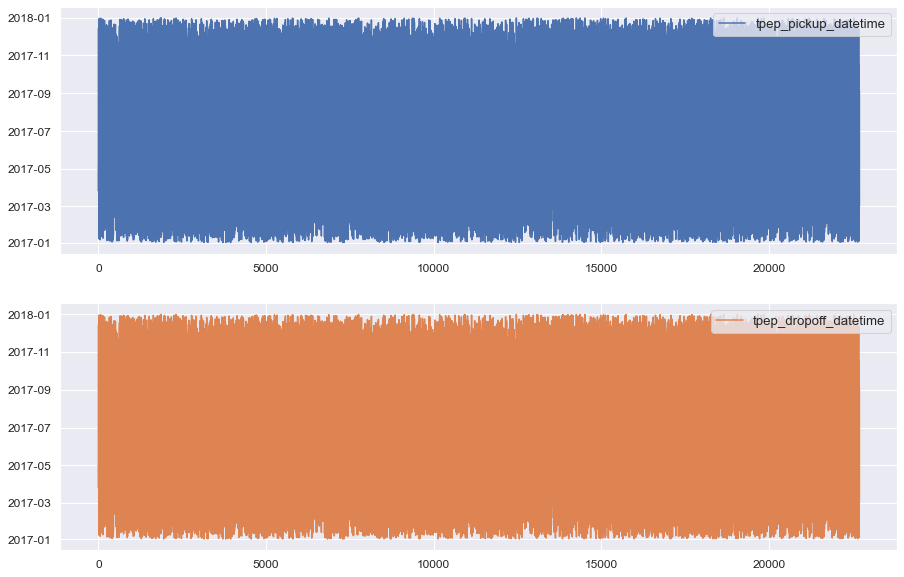

In [11]:
df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].plot(subplots = True, 
                                                                        figsize=(15, 10), 
                                                                        sharex=False, 
                                                                        sharey=False,
                                                                        kind="line")
plt.show()

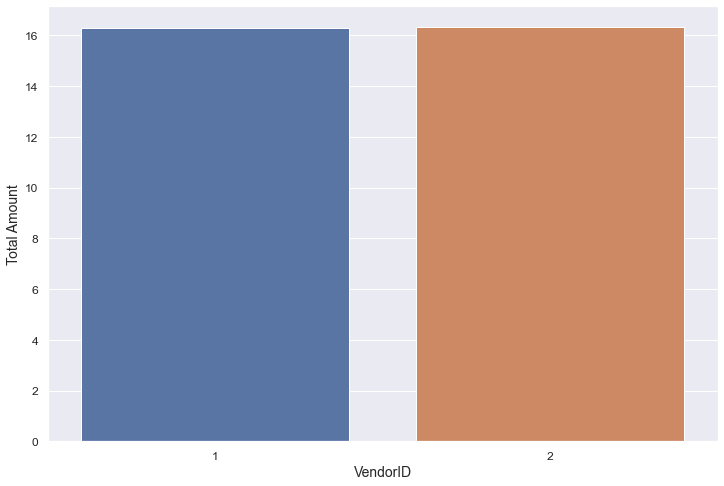

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x="VendorID", y="total_amount", data=df1, ci=None)
#plt.title('Title of the first chart')
#plt.tick_params('x', labelrotation=45)
plt.xlabel("VendorID")
plt.ylabel("Total Amount")
plt.show()

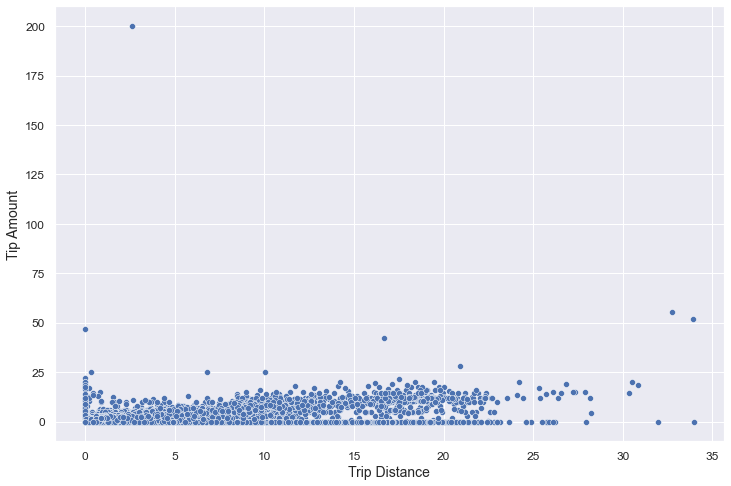

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="trip_distance", y="tip_amount", data=df1, ci=None)
#plt.title('Title of the first chart')
#plt.tick_params('x', labelrotation=45)
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.show()

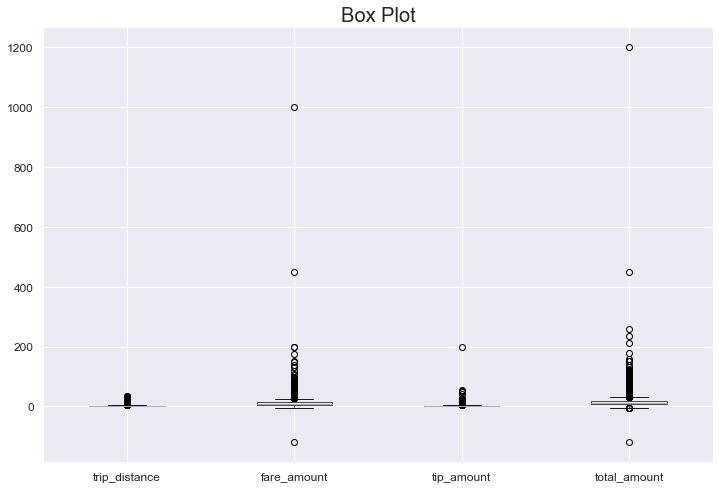

In [14]:
df1[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']].boxplot(figsize=(12, 8))
plt.title('Box Plot', size = 20)
plt.show()

***

## Course 4 Automatidata project

On that note, they have requested an additional item to be added to the initial project scope. They would like a detailed statistical analysis of payment type. That is, do the customers who use a credit card pay higher fare amounts than those who use cash?

conduct an A/B test to analyze the relationship between fare amount and payment type

In [15]:
df1.shape

(22699, 18)

In [16]:
df1 = df1.sample(frac=0.15, random_state=0)

In [17]:
df1.shape

(3405, 18)

In [18]:
df1.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5818,102188254,2,2017-12-03 01:57:00,2017-12-03 02:15:00,1,3.09,1,N,148,162,1,14.00,0.50,0.50,2.50,0.00,0.30,17.80
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,28.00,0.00,0.50,0.00,0.00,0.30,28.80
4655,14767643,2,2017-02-24 11:14:19,2017-02-24 11:20:12,2,0.72,1,N,262,236,1,5.50,0.00,0.50,1.26,0.00,0.30,7.56
7378,16019414,2,2017-02-28 04:58:42,2017-02-28 05:14:39,1,4.49,1,N,238,244,2,15.50,0.50,0.50,0.00,0.00,0.30,16.80
13914,1352127,1,2017-01-05 14:26:00,2017-01-05 14:37:00,2,2.00,1,N,239,230,2,9.50,0.00,0.50,0.00,0.00,0.30,10.30


In [19]:
df2 = df1[(df1["payment_type"] == 1) | (df1["payment_type"] == 2)]
df2

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5818,102188254,2,2017-12-03 01:57:00,2017-12-03 02:15:00,1,3.09,1,N,148,162,1,14.00,0.50,0.50,2.50,0.00,0.30,17.80
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,28.00,0.00,0.50,0.00,0.00,0.30,28.80
4655,14767643,2,2017-02-24 11:14:19,2017-02-24 11:20:12,2,0.72,1,N,262,236,1,5.50,0.00,0.50,1.26,0.00,0.30,7.56
7378,16019414,2,2017-02-28 04:58:42,2017-02-28 05:14:39,1,4.49,1,N,238,244,2,15.50,0.50,0.50,0.00,0.00,0.30,16.80
13914,1352127,1,2017-01-05 14:26:00,2017-01-05 14:37:00,2,2.00,1,N,239,230,2,9.50,0.00,0.50,0.00,0.00,0.30,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12588,100849464,2,2017-11-29 09:23:51,2017-11-29 09:30:15,1,0.71,1,N,48,48,1,6.00,0.00,0.50,1.36,0.00,0.30,8.16
10444,110427047,1,2017-12-29 21:38:55,2017-12-29 22:14:16,2,16.70,5,N,230,1,2,80.00,0.00,0.00,0.00,10.50,0.30,90.80
17145,29306988,2,2017-04-08 18:15:00,2017-04-08 18:28:00,1,5.40,1,N,261,233,2,17.00,0.00,0.50,0.00,0.00,0.30,17.80
5925,68090408,1,2017-08-11 19:29:00,2017-08-11 19:31:00,1,0.60,1,N,170,229,1,4.00,1.00,0.50,1.15,0.00,0.30,6.95


In [20]:
df2["payment_type"].value_counts()

1    2277
2    1100
Name: payment_type, dtype: int64

The relationship between fare amount and payment type

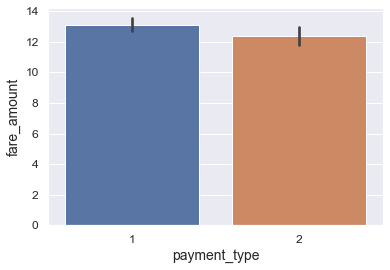

In [21]:
sns.barplot(x="payment_type", y="fare_amount",  data=df2)
plt.show()

### Two Samples T-Test

State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in payment type")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in payment type")


In [22]:
df3 = df2[["payment_type", "fare_amount"]]

In [23]:
df3.sort_values(by="payment_type")

,payment_type,fare_amount
5818,1,14.00
1267,1,14.00
7338,1,4.00
19023,1,14.50
787,1,7.00
...,...,...
17343,2,14.00
3629,2,15.00
20263,2,28.50
4984,2,3.50


In [24]:
df3["fare_amount"].mean()

12.869410719573587

In [25]:
df3.groupby(["payment_type"])["fare_amount"].mean()

payment_type
1   13.11
2   12.37
Name: fare_amount, dtype: float64

In [26]:
paymenttype1 = df3[df3["payment_type"] == 1]
paymenttype1

,payment_type,fare_amount
5818,1,14.00
4655,1,5.50
12401,1,57.50
5662,1,24.50
21767,1,8.00
...,...,...
9004,1,14.50
12655,1,6.50
1511,1,10.50
12588,1,6.00


In [27]:
paymenttype2 = df3[df3["payment_type"] == 2]
paymenttype2

,payment_type,fare_amount
18134,2,28.00
7378,2,15.50
13914,2,9.50
308,2,23.50
3061,2,39.50
...,...,...
4937,2,9.00
7641,2,11.00
10444,2,80.00
17145,2,17.00


In [28]:
paymenttype1["fare_amount"].mean()

13.10913482652613

In [29]:
paymenttype2["fare_amount"].mean()

12.373181818181818

### Simulate random sampling

Now that you’ve organized your data, use the `sample()` function to take a random sample of 20 districts from each payment. First, name a new variable: `sampled_state21`. Then, enter the arguments of the `sample()` function. 

*   `n`: Your sample size is `20`. 
*   `replace`: Choose `True` because you are sampling with replacement.
*   `random_state`: Choose an arbitrary number for the random seed – how about `13490`. 
. 

In [30]:
sampled_p1 = paymenttype1.sample(n=20, replace = True, random_state=13490)

In [31]:
sampled_p2 = paymenttype2.sample(n=20, replace = True, random_state=39103)

### One Sample T-Test

In [32]:
stats.ttest_1samp(a=sampled_p1["fare_amount"], popmean=12.86)

Ttest_1sampResult(statistic=-0.259065801660993, pvalue=0.7983704825037266)

### Two Samples T-Test

In [33]:
t, p = scipy.stats.ttest_ind (a=sampled_p1["fare_amount"], b=sampled_p2["fare_amount"], equal_var = False)

In [34]:
print("T-test value is: ", t)
print("p-value value is: ", p)

T-test value is:  -0.8544116090835189
p-value value is:  0.3986664959119248


p-value is more than 0.05, hence null hypothesis is failed to be rejected. No statistically significant on payment types.

## Import Data

In [35]:
df = pd.read_csv("nyctaximod.csv", low_memory=False)

## Data Quick Glance

In [36]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
0,1,1,0,0,0,0,0,0,0,0,0,0,0,6,3.34,13.00,2.76,16.56,1,0,0,0,1,0,844.00
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1.80,16.00,4.00,20.80,0,1,0,0,1,0,1560.00
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1.00,6.50,1.45,8.75,1,0,0,1,0,0,432.00
3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,4.37,16.50,0.00,17.80,0,0,1,0,0,1,1003.00
4,1,1,0,0,1,0,0,0,0,1,0,0,0,6,2.30,9.00,2.06,12.36,0,0,1,0,0,1,480.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19888 entries, 0 to 19887
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vendorid2                 19888 non-null  int64  
 1   paymenttype1              19888 non-null  int64  
 2   paymenttype2              19888 non-null  int64  
 3   pulocationid237           19888 non-null  int64  
 4   pulocationid161           19888 non-null  int64  
 5   pulocationid236           19888 non-null  int64  
 6   pulocationid186           19888 non-null  int64  
 7   pulocationid162           19888 non-null  int64  
 8   dolocationid161           19888 non-null  int64  
 9   dolocationid236           19888 non-null  int64  
 10  dolocationid237           19888 non-null  int64  
 11  dolocationid230           19888 non-null  int64  
 12  dolocationid170           19888 non-null  int64  
 13  passengercount            19888 non-null  int64  
 14  tripdi

In [38]:
df.dtypes.value_counts()

int64      20
float64     5
dtype: int64

In [39]:
# Descriptive Statistical Analysis
df.describe(include="all")

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
count,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00
mean,0.56,0.67,0.33,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,1.64,1.81,9.66,1.34,12.13,0.18,0.40,0.39,0.17,0.40,0.40,689.80
std,0.50,0.47,0.47,0.20,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.18,0.18,1.28,1.23,4.51,1.29,5.21,0.38,0.49,0.49,0.38,0.49,0.49,424.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.90,6.00,0.00,8.16,0.00,0.00,0.00,0.00,0.00,0.00,362.00
50%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.45,8.50,1.25,11.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.38,12.00,2.15,14.80,0.00,1.00,1.00,0.00,1.00,1.00,903.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,6.16,26.50,6.09,30.96,1.00,1.00,1.00,1.00,1.00,1.00,2535.00


In [40]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
count,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00,19888.00
mean,0.56,0.67,0.33,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,1.64,1.81,9.66,1.34,12.13,0.18,0.40,0.39,0.17,0.40,0.40,689.80
std,0.50,0.47,0.47,0.20,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.18,0.18,1.28,1.23,4.51,1.29,5.21,0.38,0.49,0.49,0.38,0.49,0.49,424.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.90,6.00,0.00,8.16,0.00,0.00,0.00,0.00,0.00,0.00,362.00
50%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.45,8.50,1.25,11.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.38,12.00,2.15,14.80,0.00,1.00,1.00,0.00,1.00,1.00,903.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,6.16,26.50,6.09,30.96,1.00,1.00,1.00,1.00,1.00,1.00,2535.00


In [41]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'duration'], dtype='object')

In [42]:
df.shape

(19888, 25)

***

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [43]:
df = df.sample(frac=0.1)

In [44]:
df

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
9259,1,1,0,0,0,0,0,0,0,0,0,0,0,4,3.85,13.50,2.96,17.76,0,0,0,0,0,0,634.00
18188,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2.64,10.50,2.82,14.12,0,1,0,0,1,0,660.00
11035,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.79,10.00,2.16,12.96,0,1,0,0,1,0,900.00
2682,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.60,7.00,0.00,8.30,1,0,0,1,0,0,420.00
3480,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.90,5.50,1.45,8.75,0,0,1,0,0,1,300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.69,7.00,1.66,9.96,0,0,1,0,0,1,535.00
11720,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.80,6.50,1.45,8.75,1,0,0,1,0,0,416.00
11741,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.12,6.50,1.00,8.30,0,1,0,0,0,1,379.00
18276,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3.50,14.50,2.00,17.80,0,0,1,0,0,1,1003.00


In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
0,1,1,0,0,0,0,0,0,0,0,0,0,0,4,3.85,13.50,2.96,17.76,0,0,0,0,0,0,634.00
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2.64,10.50,2.82,14.12,0,1,0,0,1,0,660.00
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.79,10.00,2.16,12.96,0,1,0,0,1,0,900.00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.60,7.00,0.00,8.30,1,0,0,1,0,0,420.00
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.90,5.50,1.45,8.75,0,0,1,0,0,1,300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.69,7.00,1.66,9.96,0,0,1,0,0,1,535.00
1985,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.80,6.50,1.45,8.75,1,0,0,1,0,0,416.00
1986,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.12,6.50,1.00,8.30,0,1,0,0,0,1,379.00
1987,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3.50,14.50,2.00,17.80,0,0,1,0,0,1,1003.00


In [47]:
df.shape

(1989, 25)

In [48]:
df.sort_values(by = "duration", ascending=True)

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
1358,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.00,0.01,0.00,0.31,0,0,1,0,0,1,0.00
1269,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,1,0,0,1,0,0,0.00
1759,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.00,2.50,0.00,3.80,0,0,1,0,0,1,0.00
669,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.09,2.50,0.00,3.30,0,1,0,0,1,0,0.00
216,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0.11,2.50,0.50,3.80,1,0,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,1,0,0,1,0,0,0,0,0,0,0,0,3,4.54,24.50,5.16,30.96,0,0,1,0,0,1,2372.00
931,0,0,1,0,0,0,0,0,0,0,0,1,0,1,5.30,26.00,0.00,27.80,0,0,1,0,0,1,2400.00
1750,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3.40,23.50,4.85,29.15,0,1,0,0,1,0,2400.00
418,1,1,0,0,0,0,0,0,0,0,0,0,0,1,3.46,24.50,4.00,30.30,0,0,1,0,0,1,2437.00


In [49]:
df.duration.value_counts().sort_values(ascending=False).to_frame()

,duration
300.00,62
660.00,55
540.00,52
420.00,51
360.00,51
...,...
992.00,1
650.00,1
1433.00,1
1066.00,1


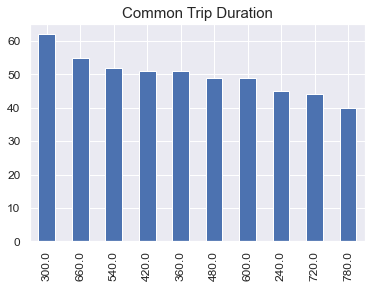

In [50]:
df.duration.value_counts().nlargest(10).plot(kind="bar")
plt.title("Common Trip Duration", size=15)
plt.show()

In [51]:
df.duration.unique()

array([ 634.,  660.,  900.,  420.,  300., 1200.,  600.,  240.,  436.,
        844.,  720., 1020.,  540., 1500.,  840.,  533.,  531.,  510.,
        554.,  494.,  480., 1140.,  135.,  543., 1055.,  712.,  396.,
       1491.,  360.,   73., 1741.,  802.,  872.,  370.,  765.,  617.,
       1248., 1080.,  429., 1005., 1185.,  308.,  588.,  231.,  257.,
       1324.,  869.,  385.,  850.,  147., 1129., 1108.,  821., 1282.,
        774.,  769.,  448.,  549.,  180.,  336.,  672.,  703.,  607.,
       2248.,  384.,  393.,  406.,  970., 1320.,  590.,  814.,  796.,
       1740., 1152.,  321.,  413.,  278., 1308.,  626.,  960., 1351.,
       1283., 1409.,  267.,  829.,  444.,  573.,  462.,  481.,  159.,
       1457., 1843., 2330.,  198.,  325., 1241., 1226.,  382.,  426.,
        386., 1088.,  947.,  319.,  726.,  971.,  416.,   48.,  452.,
        460.,  376.,   96.,  459.,  780.,  945., 1126.,  649.,  532.,
          0., 1800.,  669.,  560.,  568.,  254.,  757.,  521., 1024.,
       1220., 1520.,

In [52]:
df.nunique(dropna = False)

vendorid2                     2
paymenttype1                  2
paymenttype2                  2
pulocationid237               2
pulocationid161               2
pulocationid236               2
pulocationid186               2
pulocationid162               2
dolocationid161               2
dolocationid236               2
dolocationid237               2
dolocationid230               2
dolocationid170               2
passengercount                7
tripdistance                413
fareamount                   51
tipamount                   196
totalamount                 289
tpeppickupdatetimehour0       2
tpeppickupdatetimehour1       2
tpeppickupdatetimehour2       2
tpepdropoffdatetimehour0      2
tpepdropoffdatetimehour1      2
tpepdropoffdatetimehour2      2
duration                    845
dtype: int64

## Groupby Function

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>


In [53]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'duration'], dtype='object')

In [54]:
vendorid = df.groupby(["vendorid2"], as_index=True)["duration"].mean().to_frame()
vendorid

,duration
vendorid2,
0,732.72
1,693.18


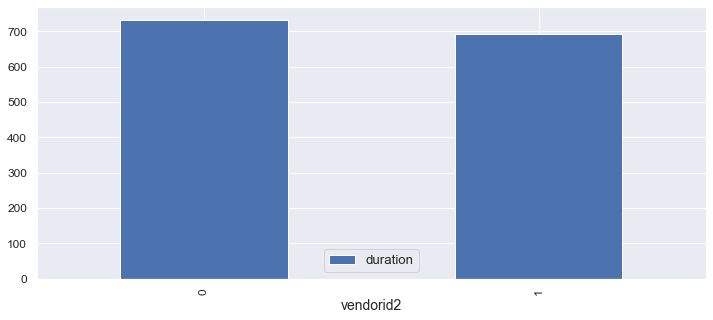

In [55]:
vendorid.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

In [56]:
payment1 = df.groupby(['paymenttype1'], as_index=False)["duration"].mean()
payment1.head()

,paymenttype1,duration
0,0,677.87
1,1,727.82


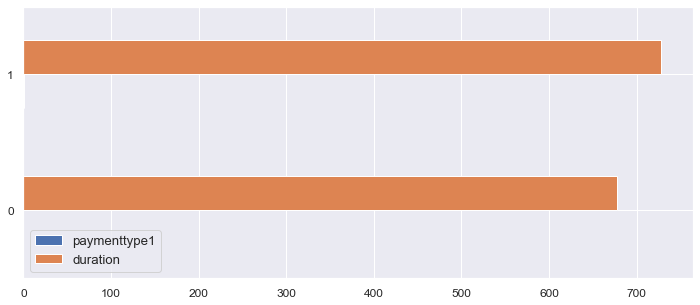

In [57]:
payment1.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

In [58]:
payment2 = df.groupby(['paymenttype2'], as_index=False)["duration"].mean()
payment2

,paymenttype2,duration
0,0,727.08
1,1,678.10


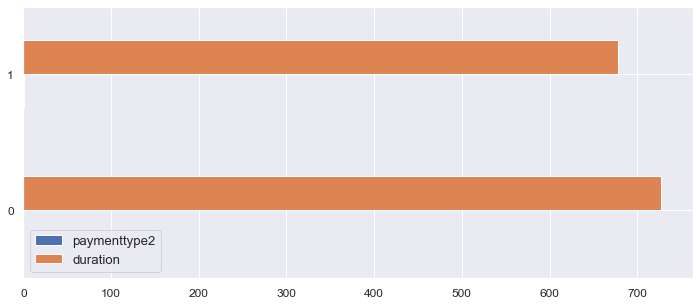

In [59]:
payment2.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

In [60]:
df.duration.describe()

count   1989.00
mean     711.07
std      440.86
min        0.00
25%      367.00
50%      615.00
75%      960.00
max     2478.00
Name: duration, dtype: float64

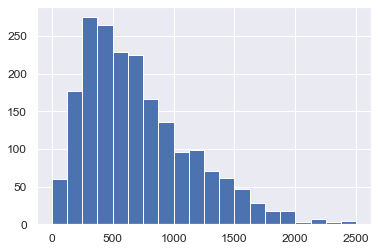

In [61]:
plt.hist(x=df.duration, bins=20, range=(0,2500))
plt.show()

In [62]:
bins = [0, 400, 800, 1200, 1600, 2000, 2400]

In [63]:
cuts = pd.cut(x=df.duration, bins=bins, include_lowest=True)

In [64]:
df["durationgroup"] = cuts

In [65]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration,durationgroup
0,1,1,0,0,0,0,0,0,0,0,0,0,0,4,3.85,13.50,2.96,17.76,0,0,0,0,0,0,634.00,"(400.0, 800.0]"
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2.64,10.50,2.82,14.12,0,1,0,0,1,0,660.00,"(400.0, 800.0]"
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.79,10.00,2.16,12.96,0,1,0,0,1,0,900.00,"(800.0, 1200.0]"
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.60,7.00,0.00,8.30,1,0,0,1,0,0,420.00,"(400.0, 800.0]"
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.90,5.50,1.45,8.75,0,0,1,0,0,1,300.00,"(-0.001, 400.0]"


In [66]:
durationrange = df.groupby(["durationgroup"])['passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount'].mean()

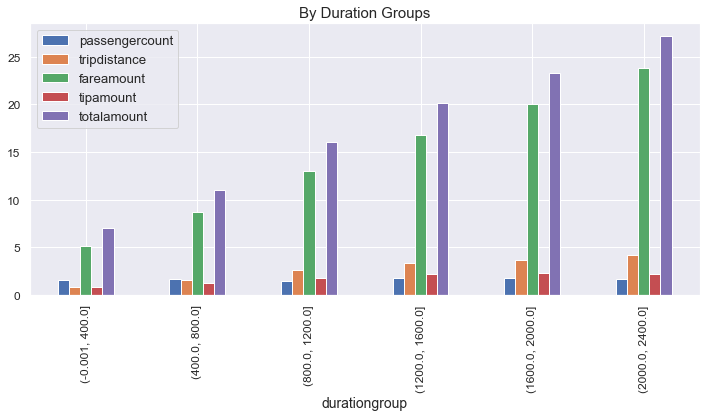

In [67]:
durationrange.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.title("By Duration Groups", size=15)
plt.show()

***

## Pivot Tables

<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

In [68]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'duration', 'durationgroup'], dtype='object')

In [69]:
a = df.pivot_table(index=None, columns=['pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162'], 
               values="duration").unstack()

a

pulocationid237  pulocationid161  pulocationid236  pulocationid186  pulocationid162          
0                0                0                0                0                duration   708.40
                                                                    1                duration   798.66
                                                   1                0                duration   861.57
                                  1                0                0                duration   609.49
                 1                0                0                0                duration   796.63
1                0                0                0                0                duration   583.76
dtype: float64

In [70]:
pd.DataFrame(a, columns=["Mean"])

Mean
pulocationid237 pulocationid161 pulocationid236 pulocationid186 pulocationid162                
0               0               0               0               0               duration 708.40
                                                                1               duration 798.66
                                                1               0               duration 861.57
                                1               0               0               duration 609.49
                1               0               0               0               duration 796.63
1               0               0               0               0               duration 583.76

In [71]:
b = df.pivot_table(index=None, columns=['dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170'], 
               values="duration").unstack()

b

dolocationid161  dolocationid236  dolocationid237  dolocationid230  dolocationid170          
0                0                0                0                0                duration   722.89
                                                                    1                duration   679.47
                                                   1                0                duration   709.03
                                  1                0                0                duration   585.19
                 1                0                0                0                duration   572.89
1                0                0                0                0                duration   762.34
dtype: float64

In [72]:
pd.DataFrame(b, columns=["Mean"])

Mean
dolocationid161 dolocationid236 dolocationid237 dolocationid230 dolocationid170                
0               0               0               0               0               duration 722.89
                                                                1               duration 679.47
                                                1               0               duration 709.03
                                1               0               0               duration 585.19
                1               0               0               0               duration 572.89
1               0               0               0               0               duration 762.34

In [73]:
c = df.pivot_table(index=None, columns=['tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2'], 
               values="duration").unstack()

c

tpeppickupdatetimehour0  tpeppickupdatetimehour1  tpeppickupdatetimehour2          
0                        0                        0                        duration   589.80
                                                  1                        duration   709.94
                         1                        0                        duration   767.22
1                        0                        0                        duration   611.03
dtype: float64

In [74]:
pd.DataFrame(c, columns=["Mean"])

Mean
tpeppickupdatetimehour0 tpeppickupdatetimehour1 tpeppickupdatetimehour2                
0                       0                       0                       duration 589.80
                                                1                       duration 709.94
                        1                       0                       duration 767.22
1                       0                       0                       duration 611.03

In [75]:
d = df.pivot_table(index=None, columns=['tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2'], 
               values="duration").unstack()

d

tpepdropoffdatetimehour0  tpepdropoffdatetimehour1  tpepdropoffdatetimehour2          
0                         0                         0                         duration   572.80
                                                    1                         duration   712.09
                          1                         0                         duration   776.18
1                         0                         0                         duration   584.75
dtype: float64

In [76]:
pd.DataFrame(d, columns=["Mean"])

Mean
tpepdropoffdatetimehour0 tpepdropoffdatetimehour1 tpepdropoffdatetimehour2                
0                        0                        0                        duration 572.80
                                                  1                        duration 712.09
                         1                        0                        duration 776.18
1                        0                        0                        duration 584.75

In [77]:
df.pivot_table(index="pulocationid237", 
               columns=['tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2'], 
               values="totalamount", margins=True, margins_name="Sum")

tpeppickupdatetimehour0     0                 1   Sum
tpeppickupdatetimehour1     0           1     0      
tpeppickupdatetimehour2     0     1     0     0      
pulocationid237                                      
0                       11.74 12.79 12.47 11.84 12.45
1                       10.09 11.56 10.36  9.37 10.49
Sum                     11.70 12.75 12.38 11.74 12.38

In [78]:
df.pivot_table(index="pulocationid237", 
               columns=['tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2'], 
               values="totalamount", margins=True, margins_name="Sum")

tpepdropoffdatetimehour0     0                 1   Sum
tpepdropoffdatetimehour1     0           1     0      
tpepdropoffdatetimehour2     0     1     0     0      
pulocationid237                                       
0                        11.34 12.80 12.56 11.64 12.45
1                        10.09 11.56 10.36  9.37 10.49
Sum                      11.30 12.77 12.46 11.54 12.38

## Crosstab

In [79]:
pd.crosstab(index=df["vendorid2"], columns=df['paymenttype1'])

paymenttype1,0,1
vendorid2,,
0,318,582
1,349,740


In [80]:
pd.crosstab(index=df["vendorid2"], columns=df['paymenttype2'])

paymenttype2,0,1
vendorid2,,
0,598,302
1,741,348


***

# Data Visualization

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is Matplotlib.  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.



## Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [81]:
# Check plot styles
#plt.style.available

## Histogram

### Seaborn Version

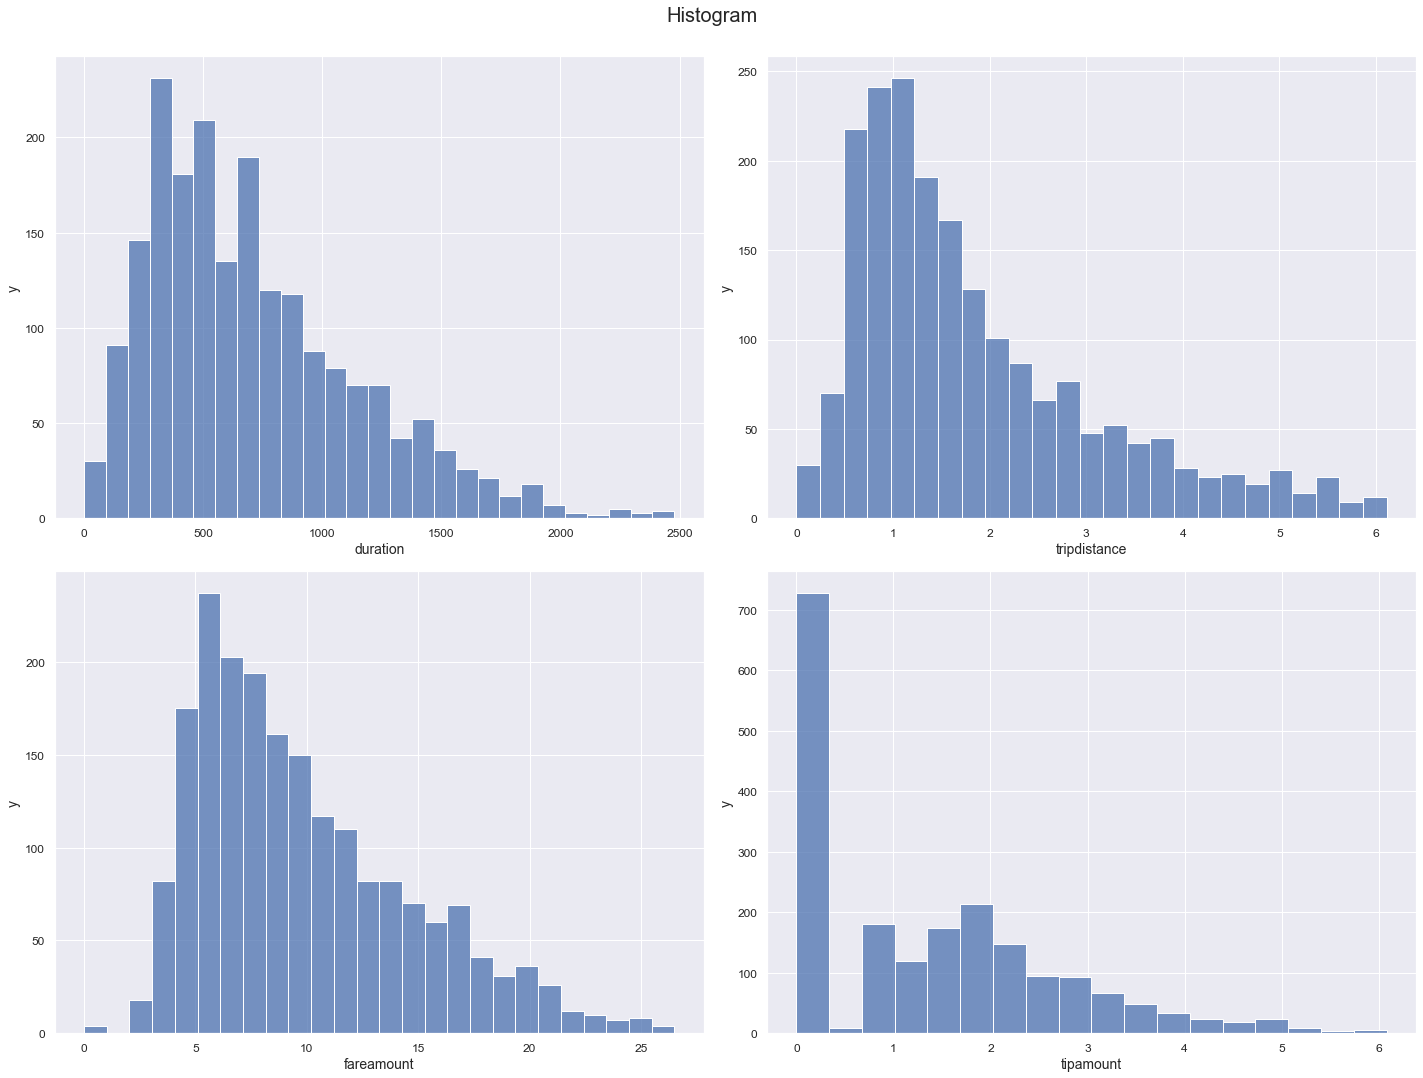

In [82]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Histogram', y=1.0, size = 20)

sns.histplot(data=df, x=df.duration, y=None, hue=None, ax=ax1)
#ax1.set_title("Title")
ax1.set(xlabel="duration", ylabel="y")


sns.histplot(data=df, x=df.tripdistance, y=None, hue=None, ax=ax2)
#ax2.set_title("Title")
ax2.set(xlabel="tripdistance", ylabel="y")

sns.histplot(data=df, x=df.fareamount, y=None, hue=None, ax=ax3)
#ax3.set_title("Title")
ax3.set(xlabel="fareamount", ylabel="y")

sns.histplot(data=df, x=df.tipamount, y=None, hue=None, ax=ax4)
#ax4.set_title("Title")
ax4.set(xlabel="tipamount", ylabel="y")

plt.tight_layout()
plt.show()

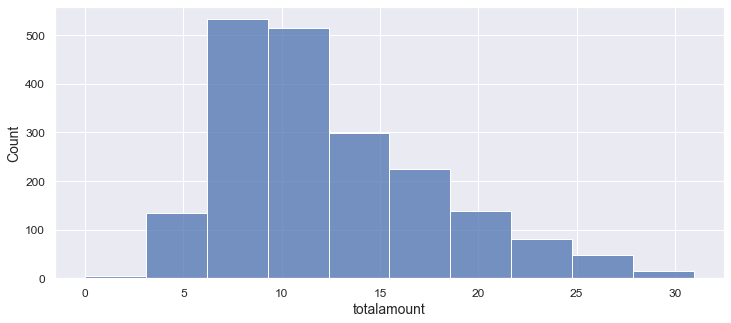

In [83]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.totalamount, data=df, bins=10)

plt.show()

## Bar Plots

### Seaborn Version

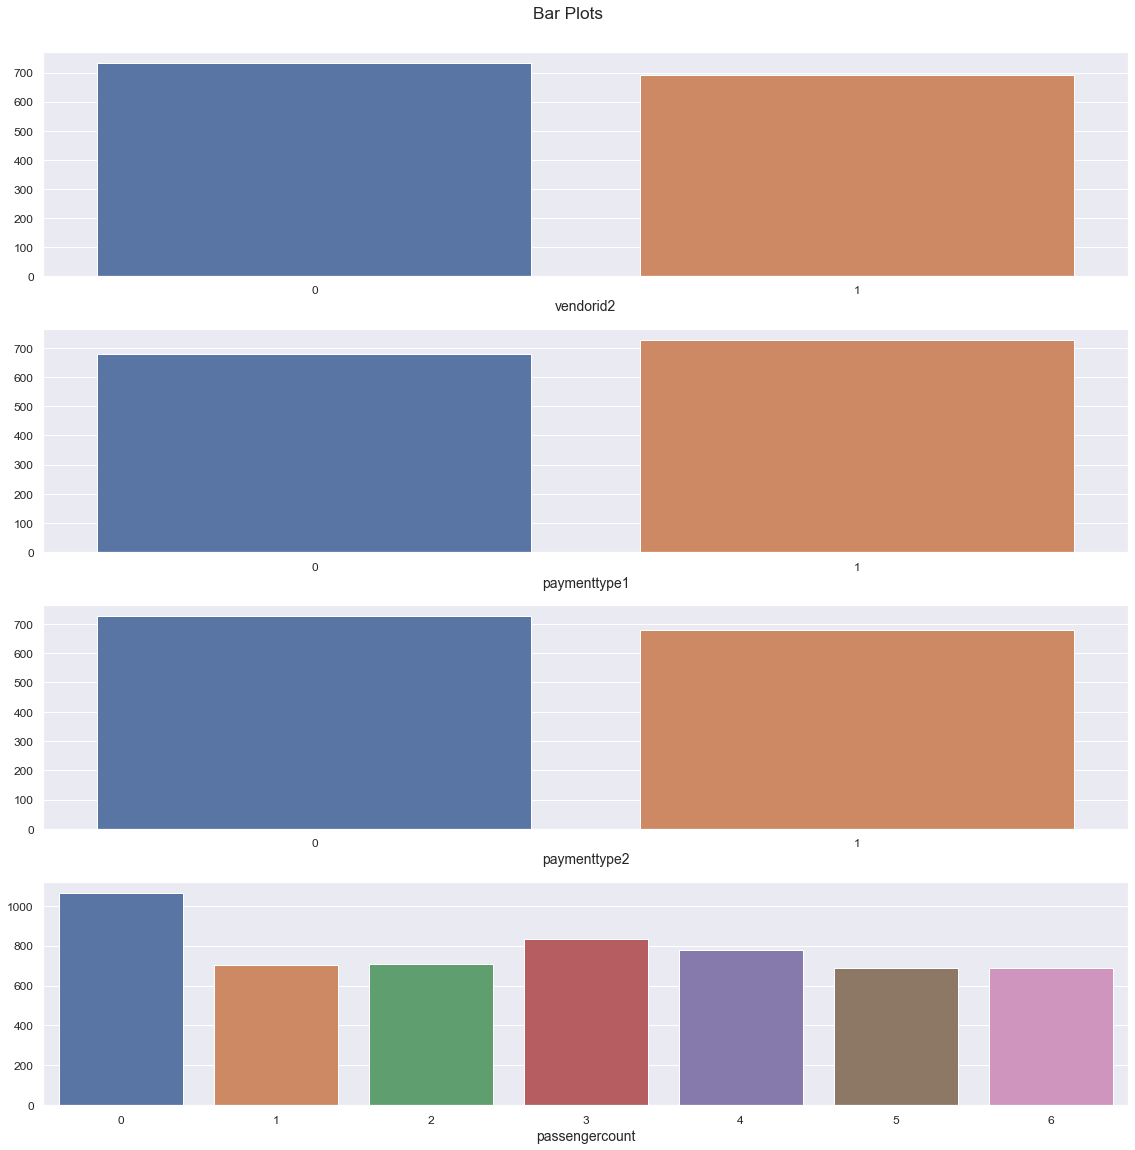

In [84]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Bar Plots', y=1.0)


sns.barplot(x="vendorid2", y="duration", data=df, ci=None, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("vendorid2")
ax[0].set_ylabel("")

sns.barplot(x="paymenttype1", y="duration", ci=None, data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("paymenttype1")
ax[1].set_ylabel("")

sns.barplot(x="paymenttype2", y="duration", ci=None, data=df, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("paymenttype2")
ax[2].set_ylabel("")

sns.barplot(x="passengercount", y="duration", ci=None, data=df, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("passengercount")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

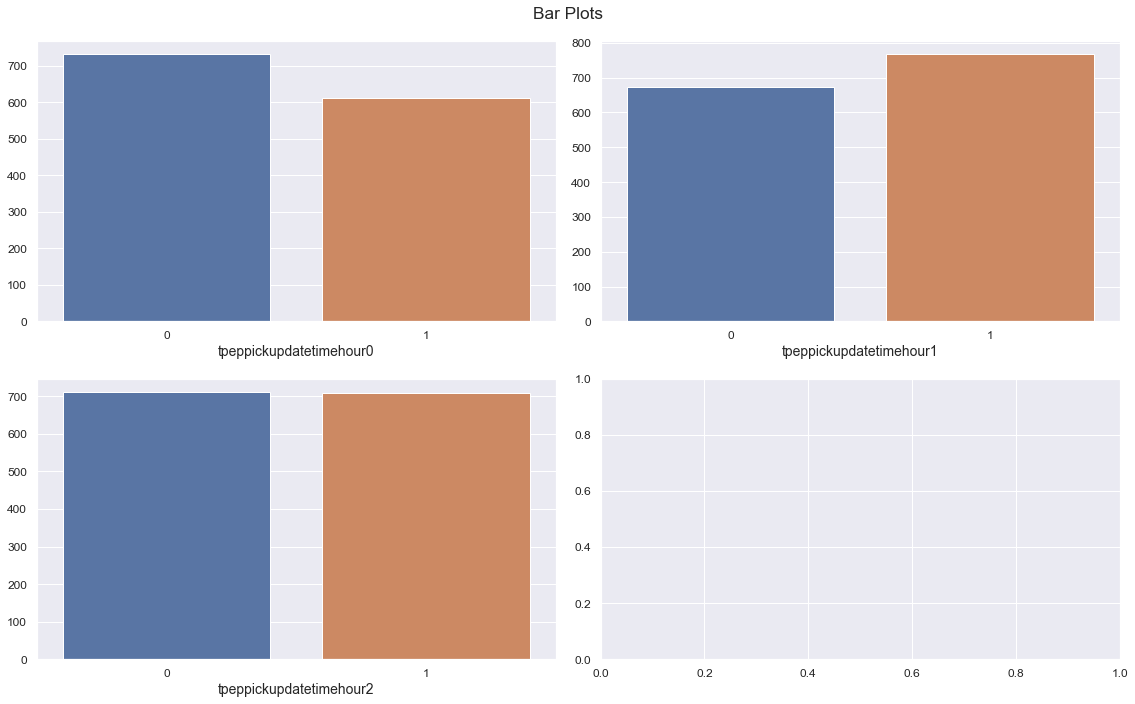

In [85]:
# Plot 2 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(16,10))
fig.suptitle('Bar Plots')

sns.barplot(x="tpeppickupdatetimehour0", y="duration", data=df, ci=None, ax=ax[0,0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0,0].set_xlabel("tpeppickupdatetimehour0")
ax[0,0].set_ylabel("")

sns.barplot(x="tpeppickupdatetimehour1", y="duration", data=df, ci=None, ax=ax[0,1])
#ax[0,1].set_title('Title of the second chart')
#ax[0,1].tick_params('x', labelrotation=45)
ax[0,1].set_xlabel("tpeppickupdatetimehour1")
ax[0,1].set_ylabel("")

sns.barplot(x="tpeppickupdatetimehour2", y="duration", data=df, ci=None, ax=ax[1,0])
#ax[1,0].set_title('Title of the first chart')
#ax[1,0].tick_params('x', labelrotation=45)
ax[1,0].set_xlabel("tpeppickupdatetimehour2")
ax[1,0].set_ylabel("")

#sns.barplot(x="pulocationid186", data=df)
#ax[1,1].set_title('Title of the second chart')
#ax[1,1].tick_params('x', labelrotation=45)
#ax[1,1].set_xlabel("")
#ax[1,1].set_ylabel("")


plt.tight_layout()
plt.show()

## Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

### Seaborn Version

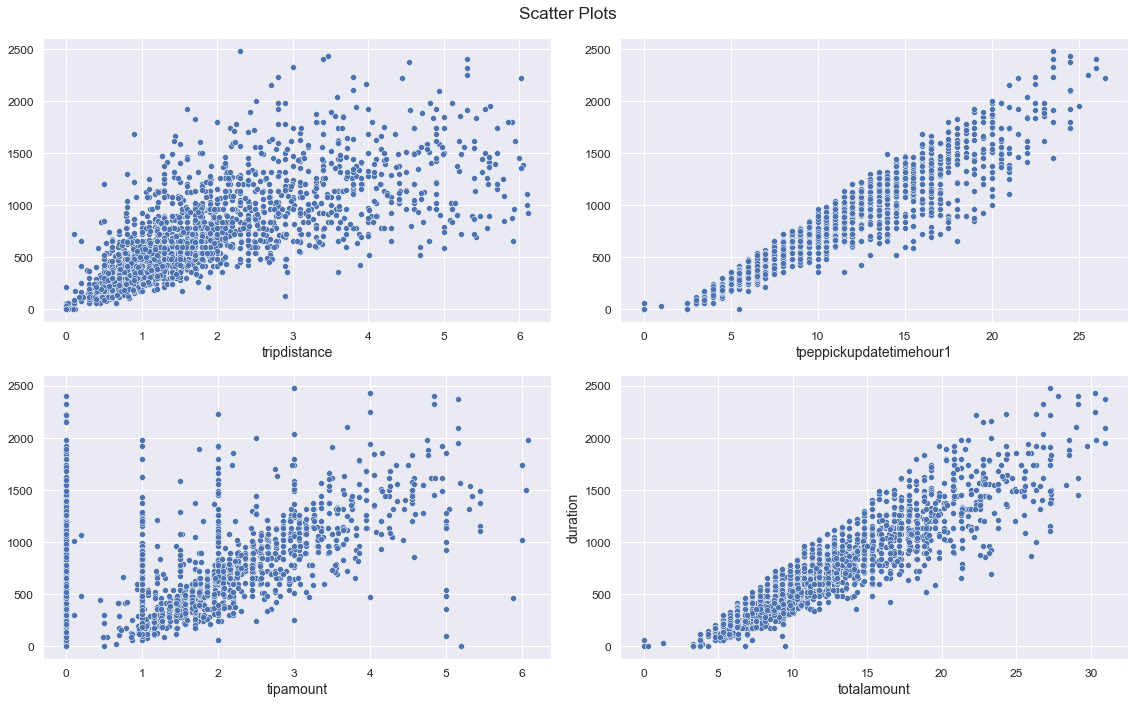

In [86]:
# Plot 2 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(16,10))
fig.suptitle('Scatter Plots')

sns.scatterplot(x="tripdistance", y="duration", data=df, ci=None, ax=ax[0,0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0,0].set_xlabel("tripdistance")
ax[0,0].set_ylabel("")

sns.scatterplot(x="fareamount", y="duration", data=df, ci=None, ax=ax[0,1])
#ax[0,1].set_title('Title of the second chart')
#ax[0,1].tick_params('x', labelrotation=45)
ax[0,1].set_xlabel("tpeppickupdatetimehour1")
ax[0,1].set_ylabel("")

sns.scatterplot(x="tipamount", y="duration", data=df, ci=None, ax=ax[1,0])
#ax[1,0].set_title('Title of the first chart')
#ax[1,0].tick_params('x', labelrotation=45)
ax[1,0].set_xlabel("tipamount")
ax[1,0].set_ylabel("")

sns.scatterplot(x="totalamount", y="duration", data=df, ci=None, ax=ax[1,1])
#ax[1,1].set_title('Title of the second chart')
#ax[1,1].tick_params('x', labelrotation=45)
ax[1,1].set_xlabel("totalamount")
#ax[1,1].set_ylabel("")


plt.tight_layout()
plt.show()

## Regression plot

In [87]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'duration', 'durationgroup'], dtype='object')

### Seaborn Version

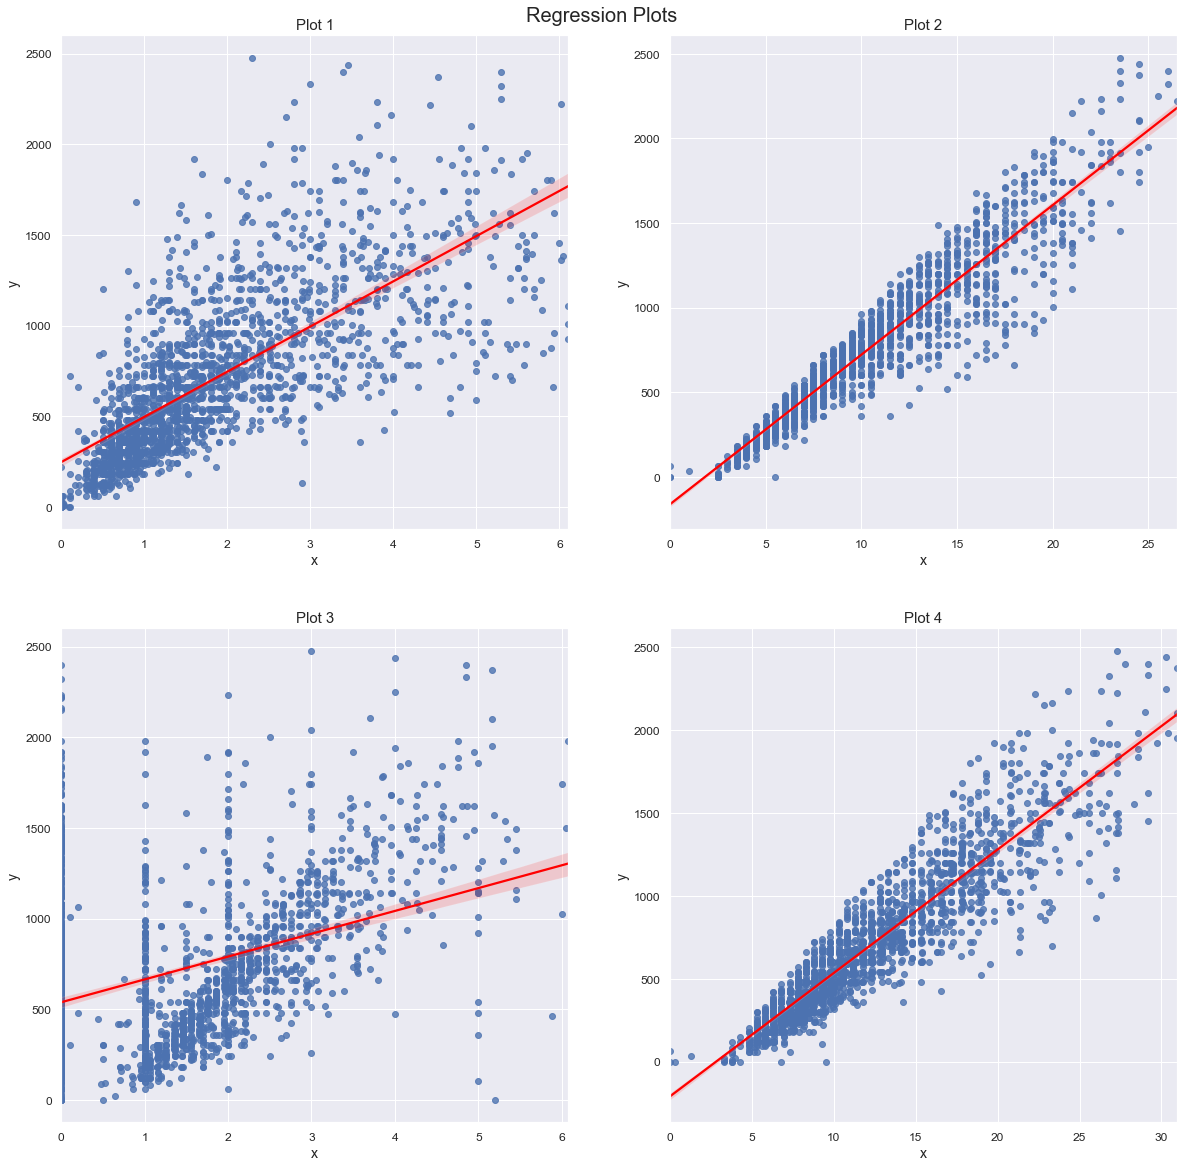

In [88]:
line_color = {'color': 'red'}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,20))

#Feature

sns.regplot(x='tripdistance', y="duration", line_kws=line_color, data=df, ax=ax1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature
sns.regplot(x='fareamount', y="duration", line_kws=line_color, data=df, ax=ax2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

sns.regplot(x='tipamount', y="duration", line_kws=line_color, data=df, ax=ax3)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

sns.regplot(x='totalamount', y="duration", line_kws=line_color, data=df, ax=ax4)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Plot 4", size=15)
plt.suptitle('Regression Plots', x=0.5, y=0.9, ha='center', fontsize=20)
plt.show()

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

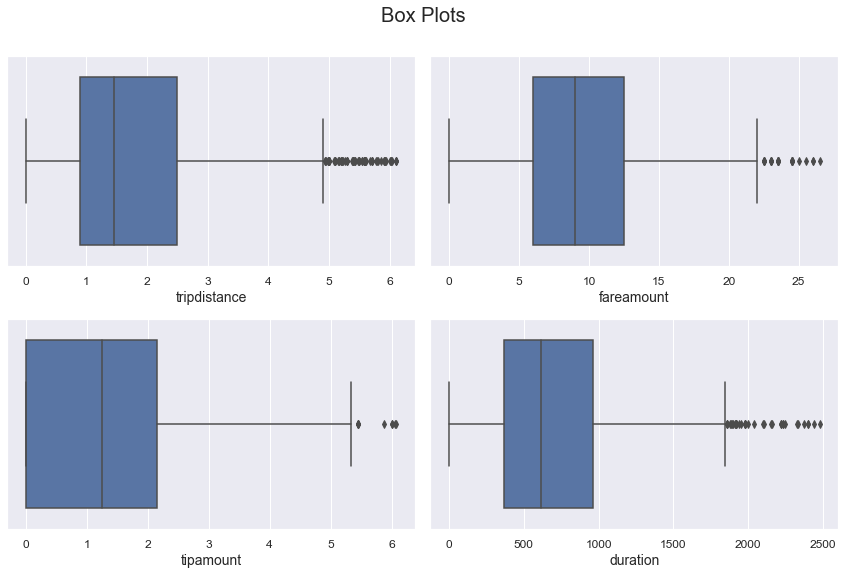

In [89]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(12,8))
fig.suptitle('Box Plots', y=1.0, size=20)

sns.boxplot(x="tripdistance", y=None, data=df, ax=ax1)
#ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("tripdistance")
ax1.set_ylabel("")

sns.boxplot(x="fareamount", y=None, data=df, ax=ax2)
#ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("fareamount")
ax2.set_ylabel("")

sns.boxplot(x="tipamount", y=None, data=df, ax=ax3)
#ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("tipamount")
ax3.set_ylabel("")

sns.boxplot(x="duration", y=None, data=df, ax=ax4)
#aax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("duration")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

## Count Plots

### Seaborn Version

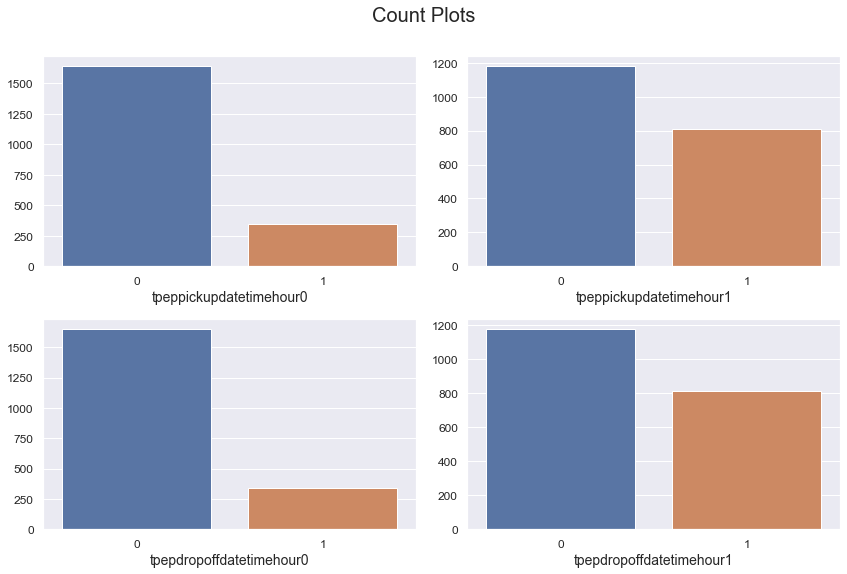

In [90]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(12,8))
fig.suptitle('Count Plots', y=1.0, size=20)

sns.countplot(x="tpeppickupdatetimehour0", data=df, ax=ax1)
#ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("tpeppickupdatetimehour0")
ax1.set_ylabel("")

sns.countplot(x="tpeppickupdatetimehour1", data=df, ax=ax2)
#ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("tpeppickupdatetimehour1")
ax2.set_ylabel("")

sns.countplot(x="tpepdropoffdatetimehour0", data=df, ax=ax3)
#ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("tpepdropoffdatetimehour0")
ax3.set_ylabel("")

sns.countplot(x="tpepdropoffdatetimehour1", data=df, ax=ax4)
#ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("tpepdropoffdatetimehour1")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

## Cat Plots

### Seaborn Version

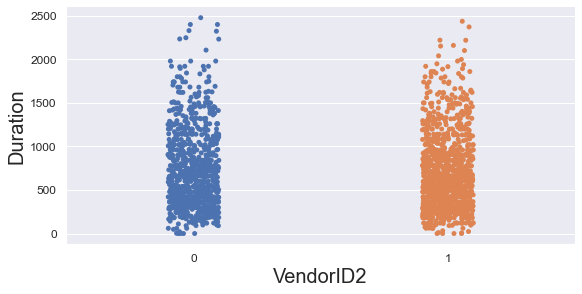

In [91]:
sns.catplot(x="vendorid2", y="duration", data=df, height=4, aspect=2, ci=None, kind="strip")
plt.xlabel("VendorID2",fontsize=20)
plt.ylabel("Duration",fontsize=20)
plt.show()

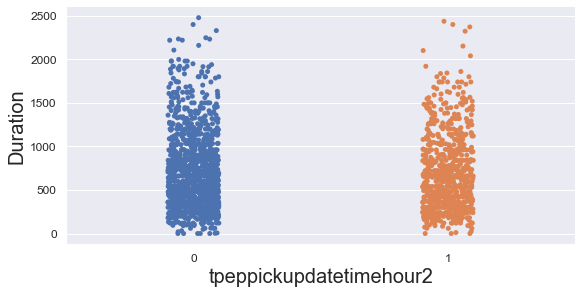

In [92]:
sns.catplot(x="tpeppickupdatetimehour2", y="duration", data=df, height=4, aspect=2, ci=None, kind="strip")
plt.xlabel("tpeppickupdatetimehour2",fontsize=20)
plt.ylabel("Duration",fontsize=20)
plt.show()

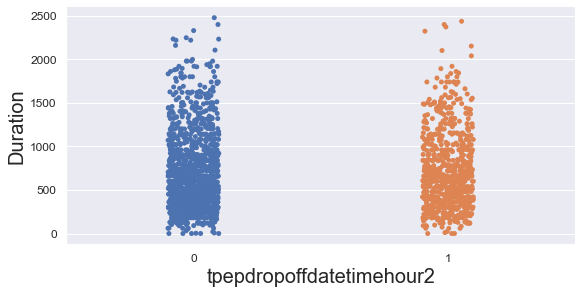

In [93]:
sns.catplot(x="tpepdropoffdatetimehour2", y="duration", data=df, height=4, aspect=2, ci=None, kind="strip")
plt.xlabel("tpepdropoffdatetimehour2",fontsize=20)
plt.ylabel("Duration",fontsize=20)
plt.show()

## Heatmap

In [94]:
df.corr()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,passengercount,tripdistance,fareamount,tipamount,totalamount,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,duration
vendorid2,1.00,0.03,-0.02,0.00,0.02,0.01,-0.05,-0.00,-0.00,0.02,-0.03,-0.03,0.03,0.25,-0.02,-0.04,0.02,-0.03,0.01,0.01,-0.02,0.02,-0.01,-0.01,-0.04
paymenttype1,0.03,1.00,-0.98,-0.02,0.01,-0.00,-0.06,0.01,-0.01,0.04,0.01,-0.06,-0.00,-0.03,0.08,0.06,0.73,0.24,0.02,-0.06,0.04,0.02,-0.06,0.05,0.05
paymenttype2,-0.02,-0.98,1.00,0.02,-0.00,0.01,0.06,-0.01,0.00,-0.04,-0.02,0.07,0.01,0.03,-0.07,-0.06,-0.72,-0.23,-0.02,0.06,-0.04,-0.02,0.06,-0.05,-0.05
pulocationid237,0.00,-0.02,0.02,1.00,-0.04,-0.04,-0.04,-0.04,0.06,0.11,0.10,-0.02,-0.03,-0.01,-0.07,-0.07,-0.04,-0.07,0.01,0.03,-0.04,0.02,0.03,-0.04,-0.06
pulocationid161,0.02,0.01,-0.00,-0.04,1.00,-0.05,-0.04,-0.04,-0.01,-0.00,0.04,0.02,0.01,0.03,0.01,0.03,0.04,0.04,0.01,0.00,0.00,0.01,-0.00,0.00,0.04
pulocationid236,0.01,-0.00,0.01,-0.04,-0.05,1.00,-0.04,-0.04,-0.01,0.12,0.16,-0.04,-0.04,-0.01,-0.06,-0.06,-0.02,-0.05,-0.03,0.03,0.01,-0.03,0.03,0.01,-0.05
pulocationid186,-0.05,-0.06,0.06,-0.04,-0.04,-0.04,1.00,-0.04,0.02,-0.03,-0.01,0.07,0.06,-0.01,0.03,0.05,-0.01,0.04,-0.01,0.03,-0.02,-0.00,0.03,-0.02,0.07
pulocationid162,-0.00,0.01,-0.01,-0.04,-0.04,-0.04,-0.04,1.00,-0.01,0.00,0.04,0.01,0.01,-0.00,-0.02,0.02,0.01,0.02,-0.04,0.02,0.02,-0.05,0.01,0.03,0.04
dolocationid161,-0.00,-0.01,0.00,0.06,-0.01,-0.01,0.02,-0.01,1.00,-0.04,-0.04,-0.04,-0.04,0.01,-0.06,-0.01,-0.00,-0.02,0.06,0.03,-0.06,0.05,0.04,-0.07,0.02
dolocationid236,0.02,0.04,-0.04,0.11,-0.00,0.12,-0.03,0.00,-0.04,1.00,-0.04,-0.04,-0.04,0.04,-0.05,-0.06,0.02,-0.05,-0.03,0.04,-0.01,-0.03,0.04,-0.00,-0.06


In [95]:
df.corr()["duration"].sort_values()

tpepdropoffdatetimehour0   -0.13
tpeppickupdatetimehour0    -0.11
dolocationid236            -0.06
pulocationid237            -0.06
dolocationid237            -0.06
paymenttype2               -0.05
pulocationid236            -0.05
vendorid2                  -0.04
dolocationid170            -0.01
tpeppickupdatetimehour2    -0.00
dolocationid230            -0.00
tpepdropoffdatetimehour2    0.00
passengercount              0.01
dolocationid161             0.02
pulocationid162             0.04
pulocationid161             0.04
paymenttype1                0.05
pulocationid186             0.07
tpeppickupdatetimehour1     0.11
tpepdropoffdatetimehour1    0.12
tipamount                   0.38
tripdistance                0.73
totalamount                 0.92
fareamount                  0.95
duration                    1.00
Name: duration, dtype: float64

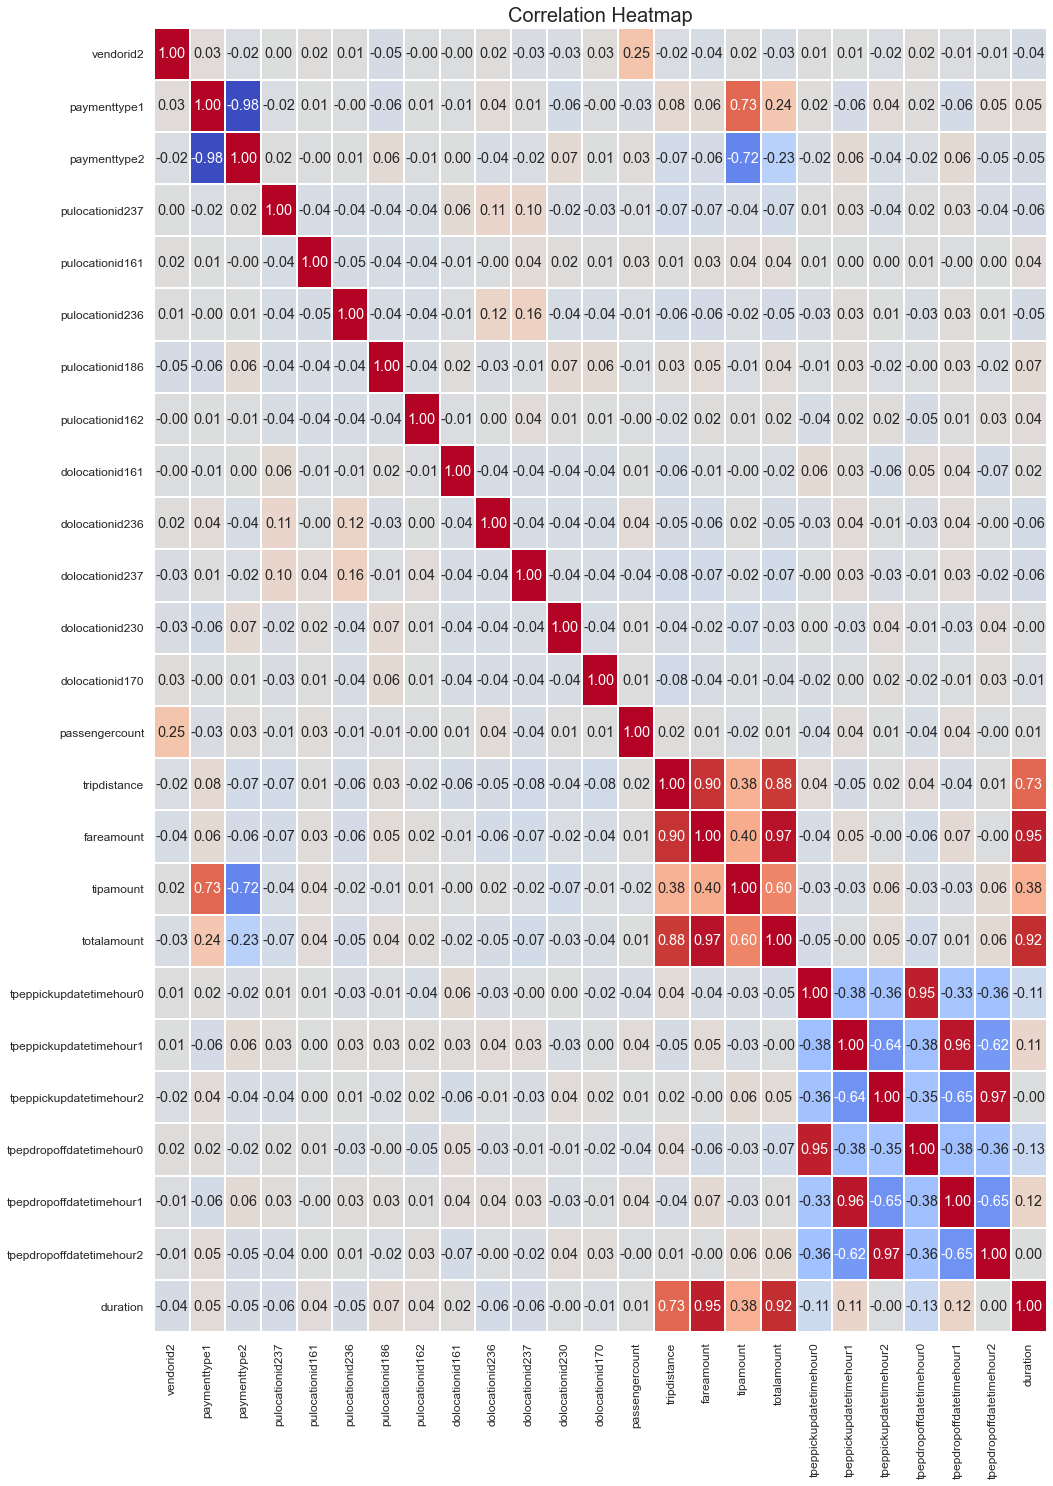

In [96]:
plt.figure(figsize=(16,24))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True, fmt='.2f', linewidths=2, cbar=None)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

***

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


***

#### Python code done by Dennis Lam